# Voronoi analysis with OVITO

This notebook mirrors `voronoi_canon.ipynb` but uses OVITO's `VoronoiAnalysisModifier` via `voronoi_ovito_utils.py`.

- Build Voronoi graphs (full and metals-only)
- Summarize graph properties and clusters
- Compute coordination distributions

Note: Ensure OVITO and ASE are installed in this environment.


In [1]:
import sys
import os
sys.path.append('/pscratch/sd/p/pvashi/irp/irp_mace_l_2/irp/density/cluster_analysis/')
sys.path.append('/pscratch/sd/p/pvashi/irp/irp_mace_l_2/irp/density/cluster_analysis/Pu_cluster_only/')

In [2]:

import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

from ovito.io import import_file

# Import the new Pu-only utilities for mixed tessellation
from voronoi_ovito_utils_pu_only import (
    build_mixed_voronoi_graph_from_pipeline,
    build_pu_only_cluster_graph_from_mixed,
    analyze_na_pu_interactions_from_mixed,
    build_neighbor_list_from_mixed,
    analyze_pu_cluster_properties_from_mixed,
    analyze_pu_coordination_in_mixed,
    plot_mixed_tessellation_analysis,
    analyze_mixed_tessellation_from_pipeline,
)

from voronoi_ovito_utils import (
    analyze_graph_properties,
)

# Import specialized plotting utilities
from plot_utils_pu_only import (
    plot_mixed_tessellation_structure,
    plot_pu_clusters_with_na_context,
    plot_na_pu_interaction_network,
    plot_pu_coordination_analysis,
    plot_3d_mixed_tessellation,
    plot_cluster_evolution_analysis,
    plot_neighbor_list_analysis,
    plot_3d_graph_components_pu_only,
)



In [3]:
# Configure your input structure/trajectory file
input_path = '/pscratch/sd/p/pvashi/irp/irp_mace_l_2/irp/density/NaCl-PuCl3/x0.27/T1100K/dump.lammpstrj'  # TODO: Set path

# Load with OVITO pipeline
aae = import_file(input_path, multiple_frames=True)
print(f"Loaded trajectory with {aae.source.num_frames} frames")
frame = 0  # choose frame index

# Compute once to confirm cell/PBC and show basic info
data0 = aae.compute(frame)
print('Cell matrix:')
print(np.array(data0.cell.matrix))
print('PBC:', tuple(bool(x) for x in data0.cell.pbc))



Loaded trajectory with 14615 frames
Cell matrix:
[[48.2223976   0.          0.         -0.09037761]
 [ 0.         48.2223976   0.         -0.09037761]
 [ 0.          0.         48.2223976  -0.09037761]]
PBC: (True, True, True)


In [4]:
# Mixed tessellation approach: Use all atoms (Na, Pu, Cl) for Voronoi construction
# but restrict cluster formation to Pu atoms only

# Build mixed Voronoi tessellation (includes all atoms)
mixed_graph = build_mixed_voronoi_graph_from_pipeline(aae, frame=frame, min_area=0.0)
print('Mixed tessellation graph properties:')
mixed_props = analyze_graph_properties(mixed_graph)
print(f"Total nodes: {mixed_props['num_nodes']}")
print(f"Total edges: {mixed_props['num_edges']}")
print(f"Species counts: {mixed_props['species_counts']}")
print(f"Average degree: {mixed_props['avg_degree']:.2f}")

# Extract Pu-only cluster graph from mixed tessellation
pu_cluster_graph = build_pu_only_cluster_graph_from_mixed(mixed_graph, min_area=0.0)
print('\nPu-only cluster graph properties:')
pu_props = analyze_graph_properties(pu_cluster_graph)
print(f"Pu nodes: {pu_props['num_nodes']}")
print(f"Pu edges: {pu_props['num_edges']}")
print(f"Average Pu degree: {pu_props['avg_degree']:.2f}")

# Analyze Na-Pu interactions
na_pu_interactions = analyze_na_pu_interactions_from_mixed(mixed_graph, min_area=0.0)
print('\nNa-Pu interaction analysis:')
print(f"Number of Na-Pu edges: {na_pu_interactions['num_na_pu_edges']}")
print(f"Average Na-Pu facet area: {na_pu_interactions['avg_na_pu_area']:.4f}")
print(f"Pu atoms with Na neighbors: {na_pu_interactions['pu_atoms_with_na_neighbors']}")
print(f"Fraction of Pu atoms with Na neighbors: {na_pu_interactions['pu_with_na_fraction']:.3f}")


Mixed tessellation graph properties:
Total nodes: 3584
Total edges: 27490
Species counts: {'Pu': 384, 'Cl': 2176, 'Na': 1024}
Average degree: 15.34

Pu-only cluster graph properties:
Pu nodes: 384
Pu edges: 44
Average Pu degree: 0.23

Na-Pu interaction analysis:
Number of Na-Pu edges: 966
Average Na-Pu facet area: 0.0000
Pu atoms with Na neighbors: 362
Fraction of Pu atoms with Na neighbors: 0.943


In [5]:
# Comprehensive Pu cluster analysis using mixed tessellation
comprehensive_analysis = analyze_pu_cluster_properties_from_mixed(
    aae, frame=frame, min_area=0.0
)

print('Comprehensive Pu cluster analysis:')
print(f"Number of Pu clusters: {comprehensive_analysis['num_clusters']}")
print(f"Largest cluster size: {comprehensive_analysis['largest_cluster_size']}")
print(f"Average cluster size: {comprehensive_analysis['avg_cluster_size']:.2f}")
print(f"Cluster sizes: {comprehensive_analysis['cluster_sizes']}")

# Analyze Pu coordination in mixed environment
pu_coord_stats = comprehensive_analysis['pu_coordination_stats']
print('\nPu coordination statistics:')
for key, value in pu_coord_stats.items():
    print(f"{key}: {value:.3f}")

# Build neighbor list for detailed analysis
neighbor_list = comprehensive_analysis['neighbor_list']
print(f'\nNeighbor list contains {len(neighbor_list)} atoms with neighbors')



Comprehensive Pu cluster analysis:
Number of Pu clusters: 340
Largest cluster size: 4
Average cluster size: 1.13
Cluster sizes: [1, 2, 1, 1, 1, 1, 2, 1, 2, 4, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 2, 1, 1, 1, 1, 1, 2, 2, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1

In [6]:
# (Optional) Temporal analysis over selected frames with OVITO pipeline
# frames = list(range(0, min(aae.source.num_frames, 50), 5))
# temporal = analyze_temporal_graph_properties_from_pipeline(aae, frames=frames, min_area=0.0)
# plot_temporal_graph_properties(temporal)

print('Notebook scaffold ready. Set input_path and run cells.')



Notebook scaffold ready. Set input_path and run cells.


/pscratch/sd/p/pvashi/irp/irp_mace_l_2/irp/density/cluster_analysis/Pu_cluster_only/plot_utils_pu_only.py:118: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


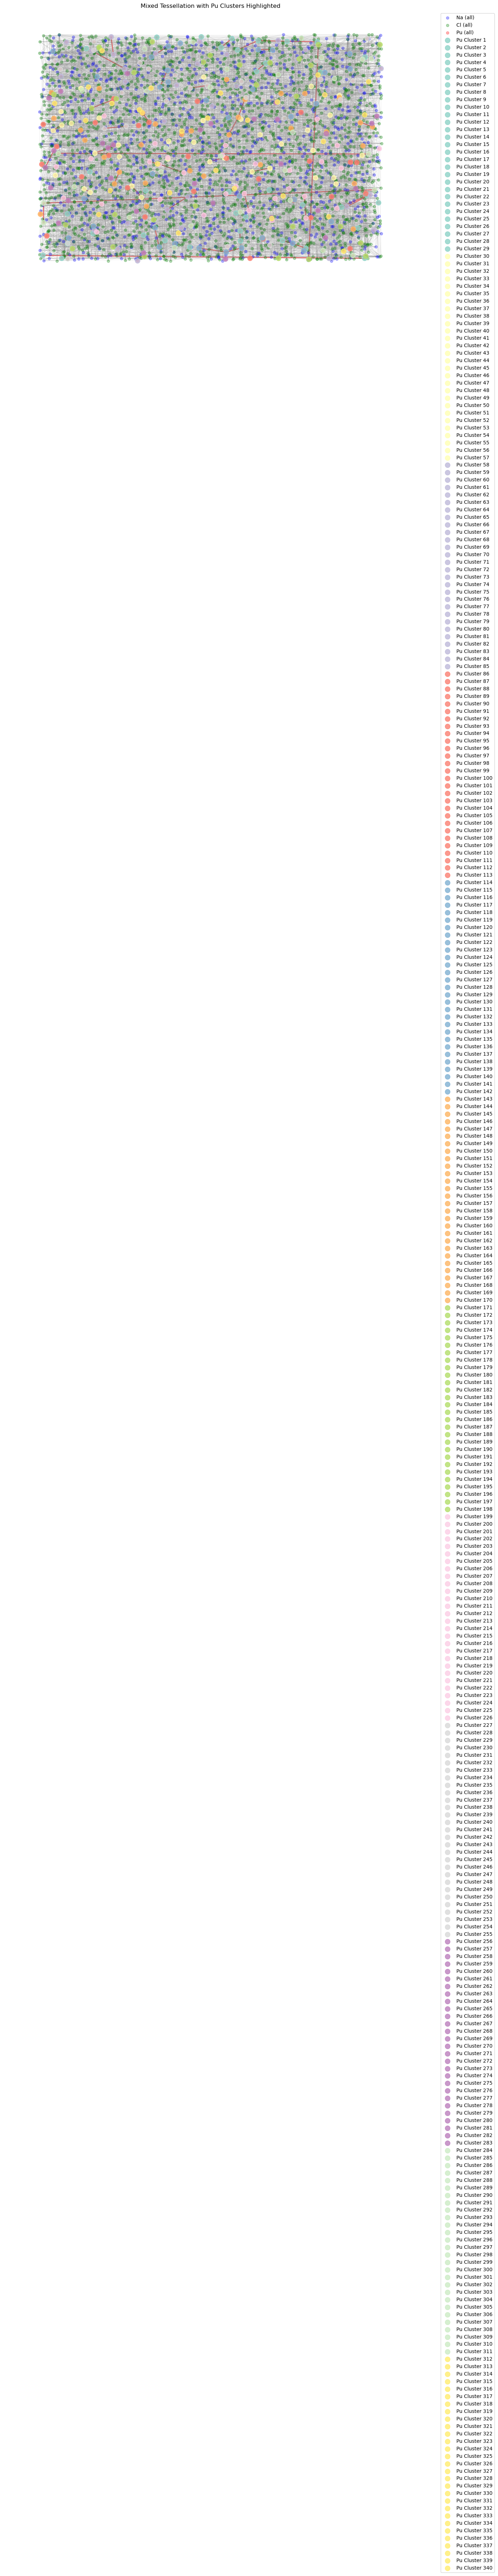

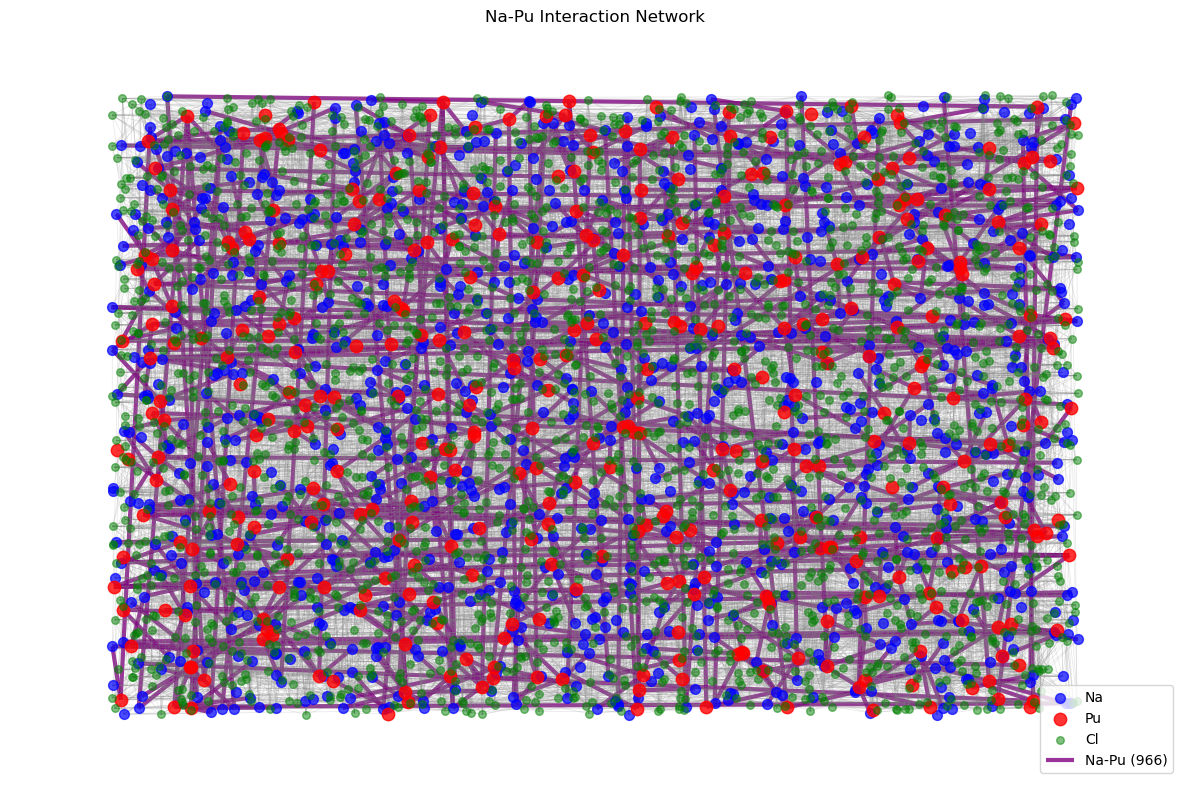

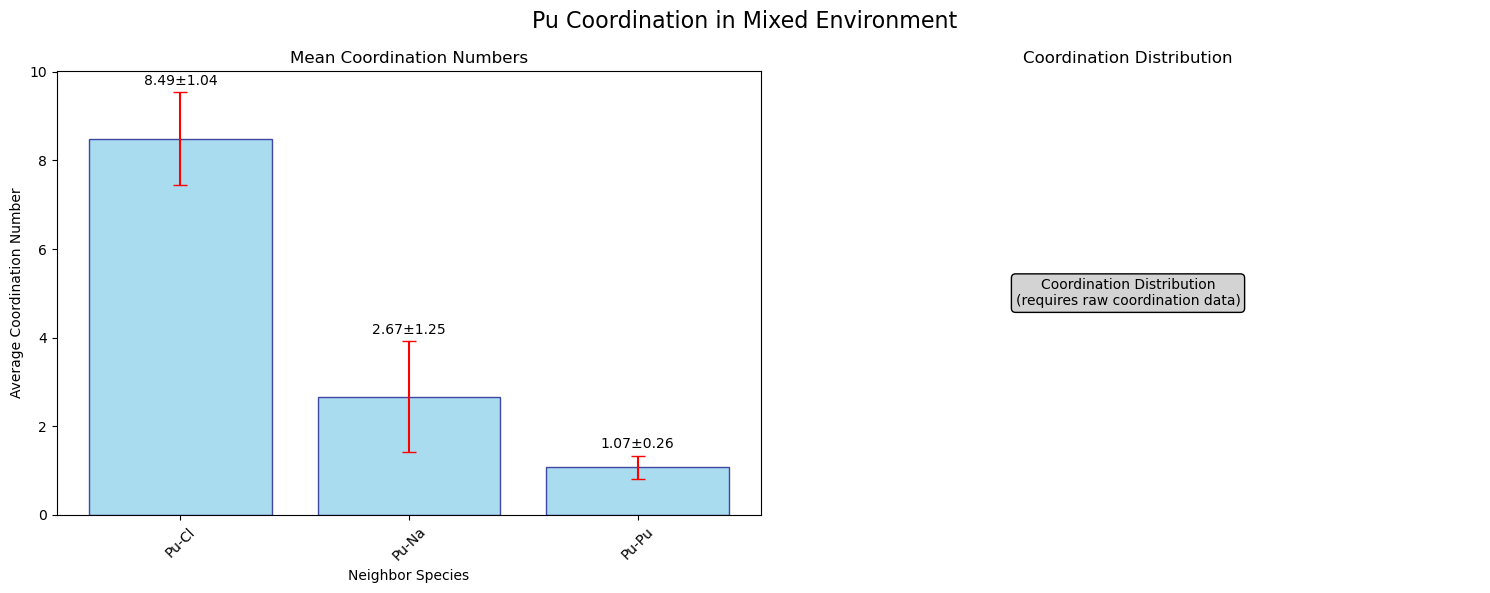

In [7]:
# Enhanced visualization using mixed tessellation approach

# Plot mixed tessellation structure with Pu clusters highlighted
plot_mixed_tessellation_structure(
    mixed_graph, pu_cluster_graph, 
    title="Mixed Tessellation with Pu Clusters Highlighted"
)

# Plot Na-Pu interaction network
plot_na_pu_interaction_network(
    mixed_graph, min_area=0.0,
    title="Na-Pu Interaction Network"
)

# Plot Pu coordination analysis
plot_pu_coordination_analysis(
    pu_coord_stats,
    title="Pu Coordination in Mixed Environment"
)



In [8]:
# 3D visualization of Pu clusters with Na context
data0 = aae.compute(frame)
names = _names_from_data_particles(data0.particles)

# Create cluster IDs array for Pu atoms
pu_cluster_ids = -np.ones(len(names), dtype=int)
pu_components = list(nx.connected_components(pu_cluster_graph))

for cluster_id, component in enumerate(pu_components):
    for node in component:
        if node < len(names) and names[node] == "Pu":
            pu_cluster_ids[node] = cluster_id

# Plot 3D visualization
plot_pu_clusters_with_na_context(
    data0, pu_cluster_ids, names, max_clusters=6
)

# Plot 3D mixed tessellation
plot_3d_mixed_tessellation(
    data0, mixed_graph, pu_cluster_graph, max_clusters=6
)

# Plot 3D Pu-only graph components with Na context
plot_3d_graph_components_pu_only(
    pu_cluster_graph, data0, names, max_components=6, show_na_context=True
)



NameError: name '_names_from_data_particles' is not defined

In [ ]:
# Compare Pu-only graph components with and without Na context
print("Pu-only Graph Components Analysis:")
print("=" * 50)

# Show Pu-only components without Na context for cleaner visualization
plot_3d_graph_components_pu_only(
    pu_cluster_graph, data0, names, max_components=6, show_na_context=False
)

# Show Pu-only components with Na context for spatial reference
plot_3d_graph_components_pu_only(
    pu_cluster_graph, data0, names, max_components=6, show_na_context=True
)

print(f"Total Pu clusters found: {len(pu_components)}")
print(f"Cluster sizes: {[len(comp) for comp in pu_components]}")
print(f"Largest cluster size: {max([len(comp) for comp in pu_components]) if pu_components else 0}")
print(f"Average cluster size: {np.mean([len(comp) for comp in pu_components]):.2f}")


Pu-only Graph Components Analysis:


NameError: name 'plot_3d_graph_components_pu_only' is not defined

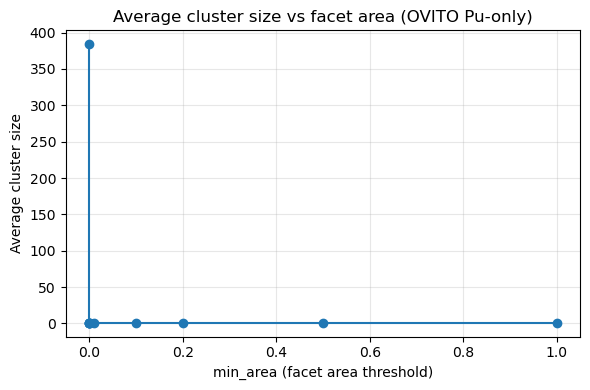

In [ ]:
# Comprehensive analysis with different facet area thresholds
import numpy as np
import matplotlib.pyplot as plt

# Test different min_area thresholds to see how they affect Pu clustering
thresholds = [0, 1e-10, 1e-8, 1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 0.2, 0.5, 1]

cluster_stats = []
na_pu_stats = []

for t in thresholds:
    # Build mixed tessellation with current threshold
    mixed_t = build_mixed_voronoi_graph_from_pipeline(aae, frame=frame, min_area=float(t))
    pu_cluster_t = build_pu_only_cluster_graph_from_mixed(mixed_t, min_area=float(t))
    
    # Get cluster statistics
    pu_components = list(nx.connected_components(pu_cluster_t))
    cluster_sizes = [len(comp) for comp in pu_components]
    
    cluster_stats.append({
        'threshold': t,
        'num_clusters': len(pu_components),
        'largest_cluster': max(cluster_sizes) if cluster_sizes else 0,
        'avg_cluster_size': float(np.mean(cluster_sizes)) if cluster_sizes else 0.0,
    })
    
    # Get Na-Pu interaction statistics
    na_pu_interactions_t = analyze_na_pu_interactions_from_mixed(mixed_t, min_area=float(t))
    na_pu_stats.append({
        'threshold': t,
        'num_na_pu_edges': na_pu_interactions_t['num_na_pu_edges'],
        'avg_na_pu_area': na_pu_interactions_t['avg_na_pu_area'],
        'pu_with_na_fraction': na_pu_interactions_t['pu_with_na_fraction'],
    })

# Plot results
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('Pu Clustering Analysis with Mixed Tessellation', fontsize=16)

thresholds_array = np.array([s['threshold'] for s in cluster_stats])
num_clusters = [s['num_clusters'] for s in cluster_stats]
largest_clusters = [s['largest_cluster'] for s in cluster_stats]
avg_cluster_sizes = [s['avg_cluster_size'] for s in cluster_stats]

# Plot 1: Number of clusters vs threshold
axes[0, 0].plot(thresholds_array, num_clusters, 'b-o', linewidth=2, markersize=4)
axes[0, 0].set_xlabel('min_area threshold')
axes[0, 0].set_ylabel('Number of Pu Clusters')
axes[0, 0].set_title('Cluster Count vs Facet Area Threshold')
axes[0, 0].set_xscale('log')
axes[0, 0].grid(True, alpha=0.3)

# Plot 2: Largest cluster size vs threshold
axes[0, 1].plot(thresholds_array, largest_clusters, 'r-s', linewidth=2, markersize=4)
axes[0, 1].set_xlabel('min_area threshold')
axes[0, 1].set_ylabel('Largest Cluster Size')
axes[0, 1].set_title('Largest Cluster Size vs Facet Area Threshold')
axes[0, 1].set_xscale('log')
axes[0, 1].grid(True, alpha=0.3)

# Plot 3: Average cluster size vs threshold
axes[1, 0].plot(thresholds_array, avg_cluster_sizes, 'g-^', linewidth=2, markersize=4)
axes[1, 0].set_xlabel('min_area threshold')
axes[1, 0].set_ylabel('Average Cluster Size')
axes[1, 0].set_title('Average Cluster Size vs Facet Area Threshold')
axes[1, 0].set_xscale('log')
axes[1, 0].grid(True, alpha=0.3)

# Plot 4: Na-Pu interactions vs threshold
na_pu_edges = [s['num_na_pu_edges'] for s in na_pu_stats]
pu_with_na_fractions = [s['pu_with_na_fraction'] for s in na_pu_stats]

ax2_twin = axes[1, 1].twinx()
line1 = axes[1, 1].plot(thresholds_array, na_pu_edges, 'purple', linewidth=2, marker='o', label='Na-Pu Edges')
line2 = ax2_twin.plot(thresholds_array, pu_with_na_fractions, 'orange', linewidth=2, marker='s', label='Pu with Na Fraction')

axes[1, 1].set_xlabel('min_area threshold')
axes[1, 1].set_ylabel('Number of Na-Pu Edges', color='purple')
ax2_twin.set_ylabel('Fraction of Pu with Na Neighbors', color='orange')
axes[1, 1].set_title('Na-Pu Interactions vs Facet Area Threshold')
axes[1, 1].set_xscale('log')
axes[1, 1].grid(True, alpha=0.3)

# Combine legends
lines = line1 + line2
labels = [l.get_label() for l in lines]
axes[1, 1].legend(lines, labels, loc='upper right')

plt.tight_layout()
plt.show()

print("Analysis complete! The mixed tessellation approach provides:")
print("- Complete Voronoi tessellation using all atoms (Na, Pu, Cl)")
print("- Pu-only cluster formation for focused analysis")
print("- Detailed Na-Pu interaction tracking")
print("- Enhanced visualization capabilities")


In [ ]:
# Neighbor list analysis for detailed understanding
print("Neighbor List Analysis:")
print("=" * 50)

# Analyze neighbor list for Pu atoms
pu_atoms_with_neighbors = 0
pu_total_neighbors = 0
pu_na_neighbors = 0
pu_pu_neighbors = 0
pu_cl_neighbors = 0

for atom_idx, neighbors in neighbor_list.items():
    if atom_idx < len(names) and names[atom_idx] == "Pu":
        pu_atoms_with_neighbors += 1
        pu_total_neighbors += len(neighbors)
        
        for neighbor_idx, neighbor_species, area in neighbors:
            if neighbor_species == "Na":
                pu_na_neighbors += 1
            elif neighbor_species == "Pu":
                pu_pu_neighbors += 1
            elif neighbor_species == "Cl":
                pu_cl_neighbors += 1

print(f"Pu atoms with neighbors: {pu_atoms_with_neighbors}")
print(f"Total Pu neighbors: {pu_total_neighbors}")
print(f"Pu-Na neighbors: {pu_na_neighbors}")
print(f"Pu-Pu neighbors: {pu_pu_neighbors}")
print(f"Pu-Cl neighbors: {pu_cl_neighbors}")

if pu_atoms_with_neighbors > 0:
    print(f"Average neighbors per Pu atom: {pu_total_neighbors / pu_atoms_with_neighbors:.2f}")
    print(f"Average Na neighbors per Pu atom: {pu_na_neighbors / pu_atoms_with_neighbors:.2f}")
    print(f"Average Pu neighbors per Pu atom: {pu_pu_neighbors / pu_atoms_with_neighbors:.2f}")
    print(f"Average Cl neighbors per Pu atom: {pu_cl_neighbors / pu_atoms_with_neighbors:.2f}")

# Plot neighbor list analysis
plot_neighbor_list_analysis(neighbor_list, names, title="Neighbor List Analysis - Mixed Tessellation")


In [ ]:
avg_sizes

[384.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]

- Lower conc
- Without Na you do
- last hunder snapshots and avg them
- cluster size as a func of conc
- histogram of CN distribution
- how does avg coordination number change when you change all these parameters.

In [ ]:
- Look at distribution of coordination number
- what did we use as our thesholds